In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [87]:
data=pd.read_csv('iris-data.csv')
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Explore the data

In [88]:
data.shape

(150, 5)

In [89]:
data.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [90]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,150.0,5.644627,1.312781,0.055,5.1,5.70,6.4,7.9
sepal_width_cm,150.0,3.054667,0.433123,2.000,2.8,3.00,3.3,4.4
petal_length_cm,150.0,3.758667,1.764420,1.000,1.6,4.35,5.1,6.9
petal_width_cm,145.0,1.236552,0.755058,0.100,0.4,1.30,1.8,2.5


In [91]:
data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

### Handle NaN values

In [92]:
data=data.dropna()

In [93]:
data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

use a linear algorithm to estimate the missing data. Linear interpolation assumes that there is a straight line between the points and the missing point will fall on that line. This is a good enough approximation for weather related data. Weather related data is typically a time series. Therefore, we do not want to drop rows from our data if possible. It is prefereable to estimate the missing values rather than remove the rows. However, if you have data from a single point in time, perhaps a better solution would be to remove the rows.

In [ ]:
# data_fixed=data.interpolate(method ='linear', limit_direction ='forward',inplace=False) 

### Handle ouliers
Some common ways to define outliers include data that fall two standard deviations away from the mean, or those that fall outside of the lowest or highest quartiles +/- 3x the interquartile range. Especially for finding outliers, box-and-whisker plots can also help to visualize if outliers exist. 

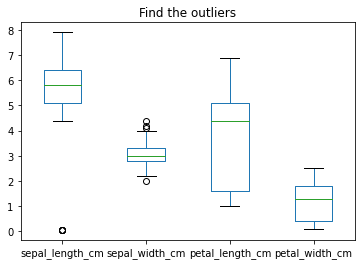

In [94]:
data.plot(kind='box',title='Find the outliers')
plt.show()


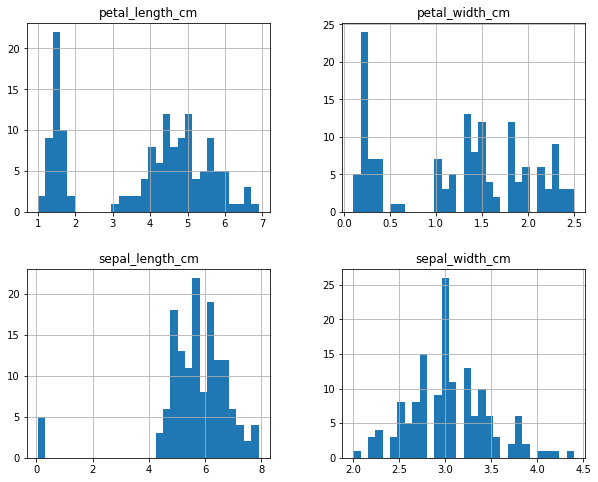

In [95]:
data.hist(bins=30, figsize=(10,8))
plt.show()

In [96]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,145.0,5.670303,1.326540,0.055,5.1,5.8,6.4,7.9
sepal_width_cm,145.0,3.046207,0.435096,2.000,2.8,3.0,3.3,4.4
petal_length_cm,145.0,3.836552,1.742955,1.000,1.6,4.4,5.1,6.9
petal_width_cm,145.0,1.236552,0.755058,0.100,0.4,1.3,1.8,2.5


In [97]:
stats=data.describe().transpose()
stats['IQR']=stats['75%']-stats['25%']
stats

# Copy the dataframe columns of 'Data', and create a new dataframe 'outliers'
outliers=pd.DataFrame(columns=data.columns)

for col in stats.index:
    iqr=stats.at[col,'IQR']
    cutoff=iqr * 3     # common way: +/- 3x the interquartile range
    lower=stats.at[col,'25%']-cutoff
    upper=stats.at[col,'75%']+cutoff
    results=data[(data[col]<lower)|(data[col]>upper)].copy()
    results['Outlier']=col
    outliers=outliers.append(results)
    
outliers

# There are 5 outliers in data dataframe

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,Outlier
77,0.067,3.0,5.0,1.7,Iris-versicolor,sepal_length_cm
78,0.060,2.9,4.5,1.5,Iris-versicolor,sepal_length_cm
79,0.057,2.6,3.5,1.0,Iris-versicolor,sepal_length_cm
80,0.055,2.4,3.8,1.1,Iris-versicolor,sepal_length_cm
81,0.055,2.4,3.7,1.0,Iris-versicolor,sepal_length_cm


In [98]:
# remove the rows which contain outlier

data=data[~data.index.isin(outliers.index)]
data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [99]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,140.0,5.870714,0.806136,4.4,5.1,5.80,6.4,7.9
sepal_width_cm,140.0,3.060000,0.433955,2.0,2.8,3.00,3.3,4.4
petal_length_cm,140.0,3.827143,1.770089,1.0,1.6,4.40,5.1,6.9
petal_width_cm,140.0,1.235714,0.766574,0.1,0.3,1.35,1.8,2.5


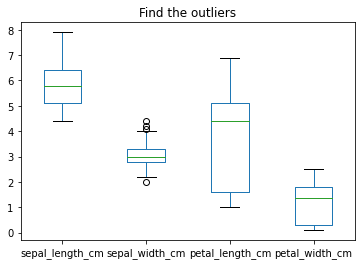

In [100]:
data.plot(kind='box',title='Find the outliers')
plt.show()

In [102]:
data['raitoSepal']=data['sepal_length_cm']/data['sepal_width_cm']

data['ratioPetal']=data['petal_length_cm']/data['petal_width_cm']

data

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,raitoSepal,ratioPetal
0,5.1,3.5,1.4,0.2,Iris-setosa,1.457143,7.000000
1,4.9,3.0,1.4,0.2,Iris-setosa,1.633333,7.000000
2,4.7,3.2,1.3,0.2,Iris-setosa,1.468750,6.500000
3,4.6,3.1,1.5,0.2,Iris-setosa,1.483871,7.500000
4,5.0,3.6,1.4,0.2,Iris-setosa,1.388889,7.000000
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.233333,2.260870
146,6.3,2.5,5.0,2.3,Iris-virginica,2.520000,2.173913
147,6.5,3.0,5.2,2.0,Iris-virginica,2.166667,2.600000
148,6.2,3.4,5.4,2.3,Iris-virginica,1.823529,2.347826


In [104]:
data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [105]:
#  Organize the messy'class' column 
data['class'] = data['class'].replace({'Iris-setossa':'Iris-setosa', 'versicolor':'Iris-versicolor',})

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


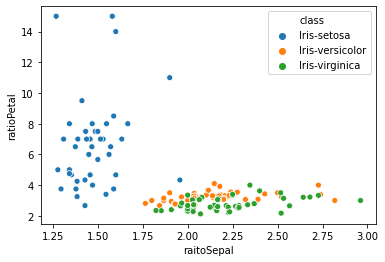

In [107]:
sns.scatterplot(x='raitoSepal',y='ratioPetal',hue='class',data=data)